In [368]:
import torch
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 폰트 설정
try:
    plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
except:
    try:
        plt.rcParams['font.family'] = 'NanumGothic'
    except:
        plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False
fm._load_fontmanager(try_read_cache=False)


# 디바이스 설정
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device("mps") # 맥
elif torch.cuda.is_available():
    device = torch.device("cuda:0") # 윈도우
else:
    device = torch.device("cpu")

print(device)

mps


In [315]:
import glob

DATA_PATH = "./data"
TRAIN_NORMAL_PATHS = sorted(glob.glob("./data/train/NORMAL/*.jpeg"))
TRAIN_TARGET_PATHS = sorted(glob.glob("./data/train/PNEUMONIA/*.jpeg"))
VAL_NORMAL_PATHS = sorted(glob.glob("./data/val/NORMAL/*.jpeg"))
VAL_TARGET_PATHS = sorted(glob.glob("./data/val/PNEUMONIA/*.jpeg"))
TEST_NORMAL_PATHS = sorted(glob.glob("./data/test/NORMAL/*.jpeg"))
TEST_TARGET_PATHS = sorted(glob.glob("./data/test/PNEUMONIA/*.jpeg"))

PATHS_LIST = [TRAIN_NORMAL_PATHS, TRAIN_TARGET_PATHS, VAL_NORMAL_PATHS, VAL_TARGET_PATHS, TEST_NORMAL_PATHS, TEST_TARGET_PATHS]
PATHS_DICT = {"TRAIN NORMAL": TRAIN_NORMAL_PATHS,
              "TRAIN TARGET": TRAIN_TARGET_PATHS,
              "VAL NORMAL": VAL_NORMAL_PATHS,
              "VAL TARGET": VAL_TARGET_PATHS,
              "TEST NORMAL": TEST_NORMAL_PATHS,
              "TEST TARGET": TEST_TARGET_PATHS}

print("[데이터 개수]")
for name, path in PATHS_DICT.items():
    print(f"· {name}: {len(path)}개")

[데이터 개수]
· TRAIN NORMAL: 1341개
· TRAIN TARGET: 3875개
· VAL NORMAL: 8개
· VAL TARGET: 8개
· TEST NORMAL: 234개
· TEST TARGET: 390개


In [316]:
import os

all_folders = [set(os.listdir("./data/train/NORMAL")), 
                  set(os.listdir("./data/train/PNEUMONIA")),
                  set(os.listdir("./data/val/NORMAL")),
                  set(os.listdir("./data/val/PNEUMONIA")),
                  set(os.listdir("./data/test/NORMAL")),
                  set(os.listdir("./data/test/PNEUMONIA"))]

count = 0
tmp_set = set()

for folder in all_folders:
    for file_name in folder:
        if ".jpeg" in file_name:
            tmp_set.add(file_name)
            count += 1

print(f"전체 중 중복 파일: {count - len(tmp_set)}개")

전체 중 중복 파일: 0개


In [317]:
import random
import torchvision

rand_index = random.randint(0, len(TRAIN_NORMAL_PATHS))

sample_normal_image = TRAIN_NORMAL_PATHS[rand_index]
print(f"[샘플 이미지 정보]")
print(f"· 파일: {sample_normal_image}")

sample_normal_image = torchvision.io.read_image(sample_normal_image)
print(f"· 사이즈: {sample_normal_image.shape}")
print(f"· 클래스: {type(sample_normal_image)}")
print(f"· 데이터: {sample_normal_image.dtype}")


[샘플 이미지 정보]
· 파일: ./data/train/NORMAL/NORMAL2-IM-0695-0001.jpeg
· 사이즈: torch.Size([1, 1294, 1500])
· 클래스: <class 'torch.Tensor'>
· 데이터: torch.uint8


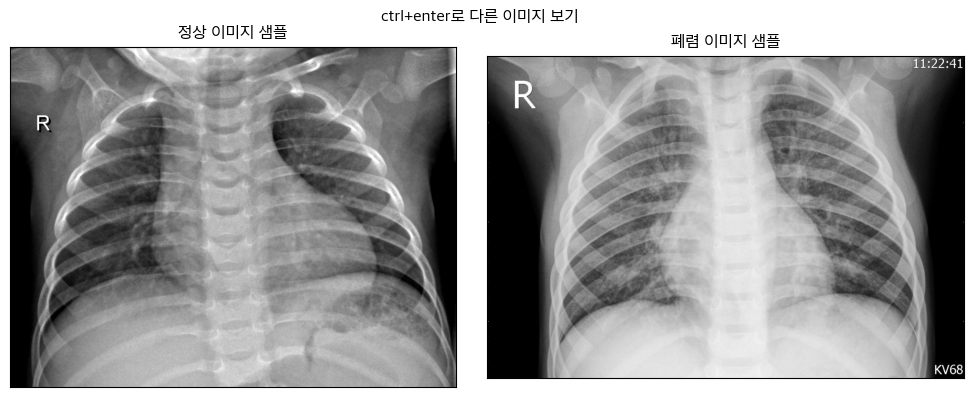

In [318]:
import torchvision
import matplotlib.pyplot as plt

rand_index = random.randint(0, len(TRAIN_NORMAL_PATHS))

sample_normal_image = TRAIN_NORMAL_PATHS[rand_index]
sample_target_image = TRAIN_TARGET_PATHS[rand_index]

sample_normal_image = torchvision.io.read_image(sample_normal_image)
sample_target_image = torchvision.io.read_image(sample_target_image)


# 축 숫자 표기 제거 함수 생성
def remove_ticks(columns=2):
    for num in range(columns):
        axes[num].set_xticks([])
        axes[num].set_yticks([])



# 샘플 이미지 출력
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
remove_ticks()

axes[0].imshow(sample_normal_image[0], cmap="gray")
axes[1].imshow(sample_target_image[0], cmap="gray")

fig.suptitle("ctrl+enter로 다른 이미지 보기")
axes[0].set_title("정상 이미지 샘플")
axes[1].set_title("폐렴 이미지 샘플")

plt.tight_layout()
plt.show()

- 폐렴 환자의 사진이 더욱 뿌옇다는 사실을 알 수 있다.

- 사이즈가 모두 다르다는 것을 알 수 있다.

In [319]:
max_w = 0
min_w = 10000000
max_h = 0
min_h = 10000000

print("[사이즈 구성]")

for name, PATH in PATHS_DICT.items():

    size_set = set()
    h_size_set = set()
    w_size_set = set()

    for image in PATH:
        image = torchvision.io.read_image(image)[0]

        size_set.add(image.shape)
        h_size_set.add(image.shape[0])
        w_size_set.add(image.shape[1])
    
    print(f"· {name}: 총 {len(size_set)} 종류")
    max_w = max(max_w, max(w_size_set))
    max_h = max(max_h, max(h_size_set))
    min_w = min(min_w, min(w_size_set))
    min_h = min(min_h, min(h_size_set))

print(f"(최대 W: {max_w}, 최소 W: {min_w}, 최대 H: {max_h}, 최소 H: {min_h})")

[사이즈 구성]
· TRAIN NORMAL: 총 1325 종류
· TRAIN TARGET: 총 3060 종류
· VAL NORMAL: 총 8 종류
· VAL TARGET: 총 8 종류
· TEST NORMAL: 총 231 종류
· TEST TARGET: 총 368 종류
(최대 W: 2916, 최소 W: 384, 최대 H: 2713, 최소 H: 127)


1. 사이즈 편차가 심하다.

2. 검증 데이터 개수가 적다.

3. 훈련 데이터의 불균형

사이즈 문제: 

모든 사진은 비슷한 비율로 구성되어 있으며, 영역을 꽉 채우게 찍혀 있다. 

그런데 사진의 크기가 다르다는 것은 신체가 작다고 해석할 수 있다. 신체가 작으면 나이가 적을 확률도 높아질 것이므로, 결과에 영향을 줄 수 있지 않을까? 나이가 어리면 폐렴에 덜 걸릴 것 같은데 흠

모델 선정

1. 분류에 특화되어 있을 것. 일단 분류니까 시그모이드.

2. 손실: 0과 1 사이니까 MSE 또는 RMSLE. 혹은 크로스엔트로피

In [320]:
from torchvision.transforms import v2
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

tmp_transform = v2.Compose([
        v2.Resize((1024,1024)),
        v2.Grayscale(num_output_channels=1),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True)])

train_dataset = ImageFolder(root = "./data/train", transform=tmp_transform)

train_dataset[0]

# train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

(Image([[[0.0941, 0.0902, 0.0902,  ..., 0.3725, 0.3765, 0.3686],
         [0.0941, 0.0902, 0.0902,  ..., 0.3686, 0.3765, 0.3765],
         [0.0941, 0.0941, 0.0941,  ..., 0.3765, 0.3804, 0.3725],
         ...,
         [0.1804, 0.1804, 0.1765,  ..., 0.4235, 0.4353, 0.4314],
         [0.1922, 0.1922, 0.1922,  ..., 0.4588, 0.4627, 0.4667],
         [0.2039, 0.2039, 0.2118,  ..., 0.4941, 0.4902, 0.4902]]], ),
 0)

In [321]:

# def get_mean_std(loader):
#     channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    
#     for data, _ in loader:
#         channels_sum += torch.mean(data, dim = [0, 2, 3])
#         channels_squared_sum += torch.mean(data**2, dim = [0, 2, 3])
#         num_batches += 1

#     mean = channels_sum / num_batches
#     std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
    
#     return mean, std

# TRAIN_MEAN, TRAIN_STD = get_mean_std(train_dataloader)
# TRAIN_MEAN, TRAIN_STD


In [322]:
# transform = v2.Compose([
#     v2.Resize((1024,1024)),
#     v2.Grayscale(num_output_channels=1),
#     v2.ToImage(),
#     v2.ToDtype(torch.float32, scale=True),
#     v2.Normalize(mean=TRAIN_MEAN, std=TRAIN_STD)
# ])

# train_dataset = ImageFolder(root = "./data/train", transform=transform)
# train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# sample = train_dataset[0][0]
# print(sample)

In [352]:
model = torchvision.models.resnet152(weights='IMAGENET1K_V1')
model.eval()

transform = torchvision.models.ResNet152_Weights.IMAGENET1K_V1.transforms()

# """ 
# from torchvision.transforms import InterpolationMode

# transform = v2.Compose([
#         v2.Resize(256, interpolation=InterpolationMode.BILINEAR),
#         v2.CenterCrop(224),
#         v2.ToImage(),
#         v2.ToDtype(torch.float32, scale=True),
#         v2.Normalize(mean=[0.485, 0.456, 0.406], 
#                      std=[0.229, 0.224, 0.225])])
# """

https://docs.pytorch.org/vision/main/models/generated/torchvision.models.resnet152.html#torchvision.models.ResNet152_Weights

이 사이트를 참조하여 데이터 전처리 진행.

In [372]:
# 모델의 주요 레이어 확인
print("[ResNet152 주요 레이어]")

for n, (name, module) in enumerate(model.named_children()):
    print(f"{n}) {name}: {module.__class__.__name__}")

[ResNet152 주요 레이어]
0) conv1: Conv2d
1) bn1: BatchNorm2d
2) relu: ReLU
3) maxpool: MaxPool2d
4) layer1: Sequential
5) layer2: Sequential
6) layer3: Sequential
7) layer4: Sequential
8) avgpool: AdaptiveAvgPool2d
9) fc: Linear


In [363]:
# 입력과 출력층
print(f"· 입력층: {model.conv1}")
print(f"· 출력층: {model.fc}")

· 입력층: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
· 출력층: Linear(in_features=2048, out_features=1000, bias=True)


In [ ]:

train_dataset = ImageFolder(root="./data/train", transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

image, label = next(iter(train_dataloader))

 conv1 → (1, 64, 112, 112)


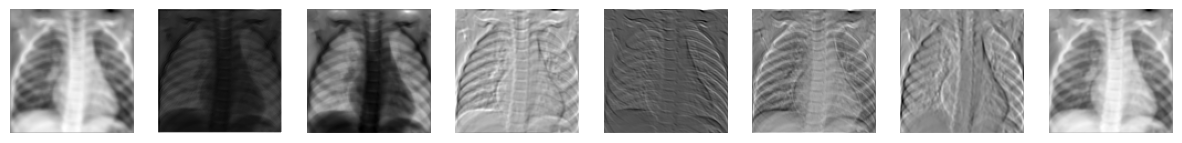

 layer1 → (1, 256, 112, 112)


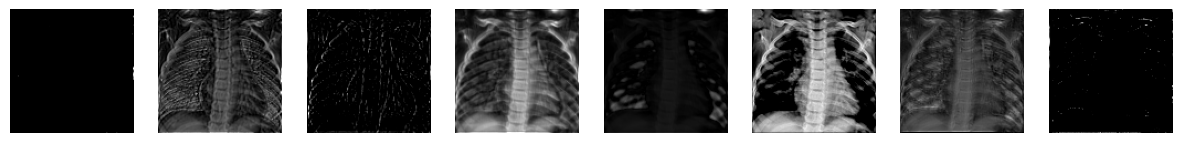

 layer2 → (1, 512, 56, 56)


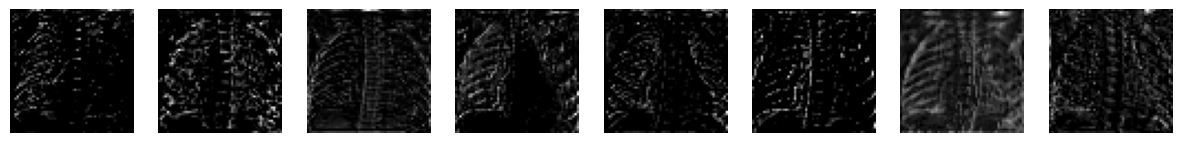

 layer3 → (1, 1024, 28, 28)


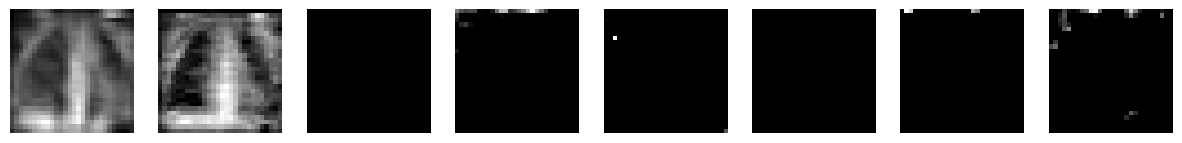

 layer4 → (1, 2048, 14, 14)


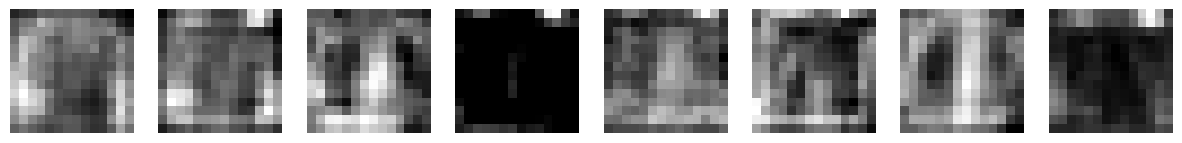

In [380]:
testimg = train_dataset[0][0]

x = transform(testimg).unsqueeze(0)
layers = dict(model.named_children())

def show_feature(name, out, max_channels=8):
    fmap = out.squeeze(0).detach().cpu()
    num = min(max_channels, fmap.shape[0])
    fig, axes = plt.subplots(1, num, figsize=(15,4))

    for i, ax in enumerate(axes if num>1 else [axes]):
        ax.imshow(fmap[i], cmap="gray")
        ax.axis("off")

    print(f" {name} → {tuple(out.shape)}")
    # axes[0].set_title(f"{name} → {tuple(out.shape)}", fontsize=10, loc="left")
    plt.show()

out = x
for name in ["conv1", "layer1", "layer2","layer3","layer4"]:
    out = layers[name](out)
    show_feature(name, out)

layer 2부터 학습하기로 함.

In [ ]:
import torch.nn as nn


# 레이어 학습, 동결 구분
for name, param in model.named_parameters():
    if name.startswith(("layer3", "layer4", "fc")):
        param.requires_grad = True # 안 쓰겠다. 즉, 재학습시키겠다. 역전파에 참여시키겠다.
    else:
        param.requires_grad = False # 쓰겠다. 재학습시키지 않겠다. 역전파 시키지 않겠다.

# . 출력 클래스 개수에 맞게 fc 수정 (예: CIFAR-10 → 10클래스)
model.fc = nn.Linear(model.fc.in_features, 10)
model.to(device)

False
